In [55]:
#Importing the libraries.
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
#Reading the dataset
dataset = pd.read_csv("C:\\Users\\laliswathi\\icp-6-skmqw\\Clustring_PCA\\CC.csv")
X = dataset.iloc[:,[1,2,3,4]]
y = dataset.iloc[:,-1]

In [57]:
#To print first n values using head()
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [58]:
#To remove null values
dataset.loc[(dataset.MINIMUM_PAYMENTS.isnull()==True),'MINIMUM_PAYMENTS']=dataset.MINIMUM_PAYMENTS.mean()
dataset.loc[(dataset.MINIMUM_PAYMENTS.isnull()==True),'CREDIT_LIMIT']=dataset.CREDIT_LIMIT.mean()

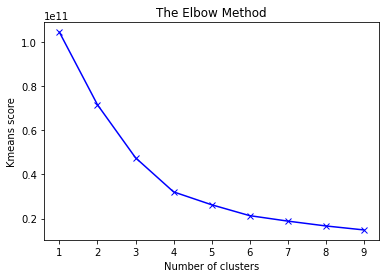

In [59]:
#Using Elbow method to determine Kmeans score
inertias=[]
K=range(1,10)
for k in K:
    kmeanmodel=KMeans(n_clusters=k,random_state=40)
    kmeanmodel.fit(X)
    inertias.append(kmeanmodel.inertia_)
plt.plot(range(1,10),inertias,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Kmeans score')
plt.title('The Elbow Method')
plt.show()

In [60]:
#KMeans clustering before scaling
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(X)
y_cluster_kmeans = km.predict(X)

In [61]:
#To calculate silhoutte score before
score_beforescaling = metrics.silhouette_score(X,y_cluster_kmeans)
print("Score before scaling:",score_beforescaling)

Score before scaling: 0.6024088993073647


In [28]:
#Applying scaling
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array=scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled_array)

In [52]:
#Applying KMeans after scaling
nclusters = 3
km = KMeans(n_clusters=nclusters,random_state=40)
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)

In [30]:
#After scaling silhouette score
score_afterscaling = metrics.silhouette_score(X_scaled,y_cluster_kmeans)
print("Score after scaling:",score_afterscaling)

Score after scaling: 0.4851146741321495


In [33]:
#Applying PCA
from sklearn.decomposition import PCA
pca= PCA(2)
X_pca= pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca)
Resultant= pd.concat([X_pca, dataset[['TENURE']]], axis=1)

In [34]:
#Applying Kmeans after PCA
nclusters=3
km= KMeans(n_clusters=nclusters)
km.fit(X_pca)

#Predicting the cluster for each data point
y_cluster_kmeans = km.predict(X_pca)
score_pca = metrics.silhouette_score(X_pca, y_cluster_kmeans)
print("PCA,KMeans scores:", score_pca)

PCA,KMeans score: 0.6126556029064714


In [36]:
#KMeans model after applying PCA on the scaled Data
pca_scaled = PCA(2)
X_pca_scaled= pca_scaled.fit_transform(X_scaled)
kmeans_pca_scaled = KMeans(n_clusters=3)
kmeans_pca_scaled.fit(X_pca_scaled)
y_pca_kmeans_scaled = kmeans_pca_scaled.predict(X_pca_scaled)

In [40]:
#Calculating Silhouette score of applying PCA on scaled dataset
pca_scaled_score=metrics.silhouette_score(X_pca_scaled, y_pca_kmeans_scaled)
print("PCA,KMeans scores:", pca_scaled_score)

PCA,KMeans scores: 0.5011971052910397


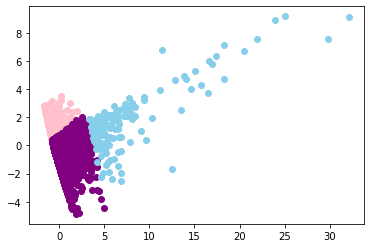

In [47]:
#Plotting the clusters
colors=["pink","purple","skyblue"]
for i in range(3):
    x_axis=X_pca_scaled[y_pca_kmeans_scaled == i][:, 0]
    y_axis=X_pca_scaled[y_pca_kmeans_scaled == i][:, 1]
    plt.scatter(x_axis,y_axis,color=colors[i])